In [53]:
import sklearn
import pandas as pd
import numpy as np

In [54]:
df = pd.read_csv("dataset_task1.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [56]:
df.shape

(7043, 21)

In [57]:
df.value_counts("PaymentMethod")


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

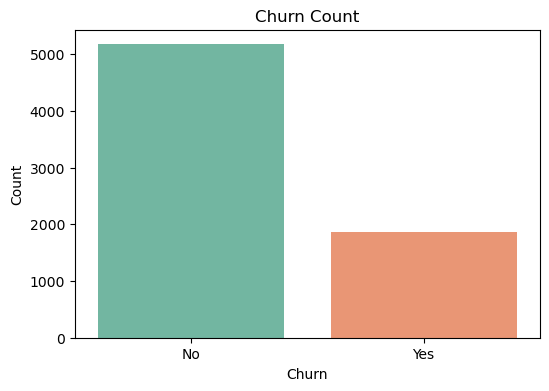

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn", hue="Churn", palette="Set2", legend=False)
plt.title("Churn Count")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

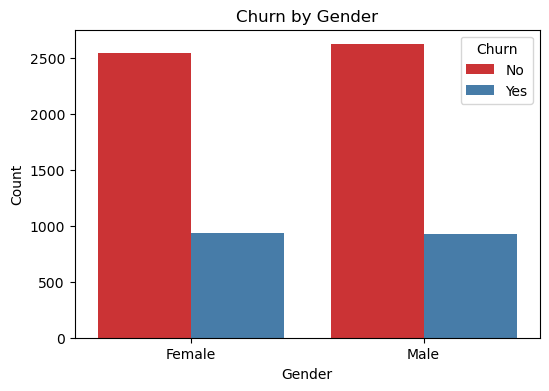

In [59]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="gender", hue="Churn", palette="Set1")
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


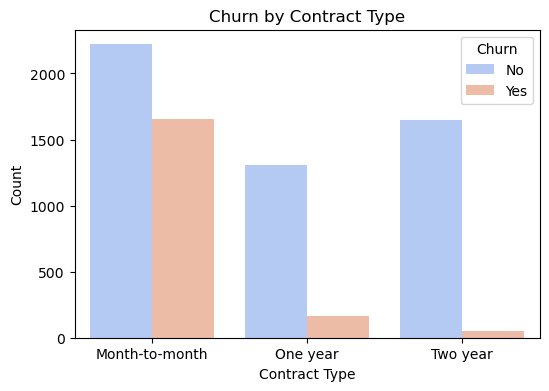

In [60]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Contract", hue="Churn", palette="coolwarm")
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()




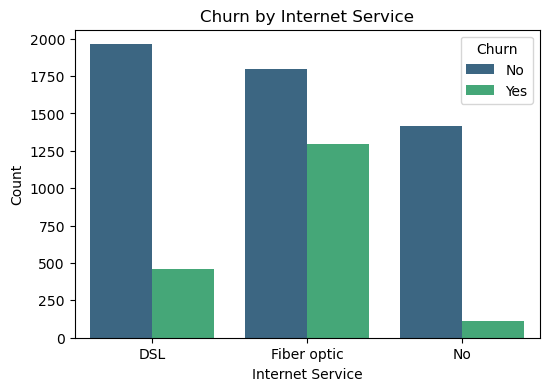

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="InternetService", hue="Churn", palette="viridis")
plt.title("Churn by Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.show()


In [62]:
df_cleaned = df[[ "gender","SeniorCitizen","Partner","Dependents", "tenure", "MonthlyCharges", "Churn","InternetService","OnlineSecurity","DeviceProtection","TechSupport","StreamingTV"]].copy()
for col in df_cleaned.select_dtypes(include="object").columns:
    df_cleaned.loc[:,col] = df_cleaned[col].astype("category").cat.codes

In [63]:
df_cleaned

,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,Churn,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV
0,0,0,1,0,1,29.85,0,0,0,0,0,0
1,1,0,0,0,34,56.95,0,0,2,2,0,0
2,1,0,0,0,2,53.85,1,0,2,0,0,0
3,1,0,0,0,45,42.30,0,0,2,2,2,0
4,0,0,0,0,2,70.70,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,84.80,0,0,2,2,2,2
7039,0,0,1,1,72,103.20,0,1,0,2,0,2
7040,0,0,1,1,11,29.60,0,0,2,0,0,0
7041,1,1,1,0,4,74.40,1,1,0,0,0,0


In [64]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [72]:
X = df.drop(columns=["customerID", "Churn"])
y = df["Churn"].map({"No": 0, "Yes": 1}) 


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =42,stratify=y)

In [73]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [74]:
numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler()                   
)

In [75]:
ct = make_column_transformer(
    (OneHotEncoder(sparse_output=False) ,[
    "gender",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod"
]),
    (numeric_transformer,[
    "SeniorCitizen",
    "tenure",
    "MonthlyCharges",
    "TotalCharges"
]))


In [76]:
ct.set_output(transform="pandas")

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod']),
                                ('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges'])])

In [80]:
df_ohe =ct.fit_transform(df)

In [272]:
pipe = make_pipeline(ct, LogisticRegression())
pipe.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('logisticregression', LogisticRegression())])

In [273]:
pipe.score(X_test,y_test)

0.8055358410220014

In [20]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge,RidgeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [133]:
base_models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR()),
    # ('knn',KNeighborsRegressor(n_neighbors=5))
]

In [134]:
final_model=RandomForestRegressor(n_estimators=100, random_state=42)

In [135]:
stack = StackingRegressor(estimators=base_models, final_estimator=final_model, cv=5)

In [136]:
pipe_linear=make_pipeline(ct,stack)
pipe_linear.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('stackingregressor',
                 StackingRegressor(cv=5,
                                   estimators=[('lr', LinearRegression()),
                                               ('rf',
                                                RandomForestRegressor(random_state=42)),
                                               ('svr', SVR())],
                                   final_estimator=RandomForestRegressor(random_state=42)))])

In [137]:
pipe_linear.score(X_test,y_test)

0.22609415425238466

In [243]:
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True)),
    ('gb', GradientBoostingClassifier(random_state=42))
    
]

In [244]:
final_model = LogisticRegression(max_iter=1000)

In [245]:
stack_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=final_model,
    cv=5
)

In [246]:
pipe_clf=make_pipeline(ct,stack_clf)

In [247]:
pipe_clf.fit(X_train,y_train)
              

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('...
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('stackingclassifier',
                 StackingClassifier(cv=5,
                                    estimators=[('lr',
                                                 LogisticRegression(max_iter=1000)),
                                                ('rf',
                                                 RandomForestClassifier(random_state=42)),
                                                ('svc', SVC(probability=True)),
                                                ('gb',
                                                 GradientBoostingClassifier(random_state=42))],
                                    final_estimator=LogisticRegression(max_iter=1000)))])

In [248]:
pipe_clf.score(X_test,y_test)

0.8034066713981547

In [205]:
pipe_clf=make_pipeline(ct,stack_clf)

In [208]:
param_grid = {
    # Logistic Regression
    'stackingclassifier__lr__C': [0.01, 0.1, 1, 10],
    'stackingclassifier__lr__penalty': ['l2'],   # usually 'l2' for stability
    'stackingclassifier__lr__solver': ['lbfgs', 'liblinear'],

    # Random Forest
    'stackingclassifier__rf__n_estimators': [50, 100, 200],
    'stackingclassifier__rf__max_depth': [None, 5, 10, 20],
    'stackingclassifier__rf__min_samples_split': [2, 5, 10],
    'stackingclassifier__rf__min_samples_leaf': [1, 2, 4],

    # SVC
    'stackingclassifier__svc__C': [0.1, 1, 10],
    'stackingclassifier__svc__kernel': ['linear', 'rbf'],
    'stackingclassifier__svc__gamma': ['scale', 'auto']
}


In [209]:
random_search = RandomizedSearchCV(
    pipe_clf,
    param_distributions=param_grid,
    n_iter=20,          # number of parameter sets to try
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)


In [220]:
gbm = GradientBoostingClassifier(random_state=42)

In [221]:
gaunb = GaussianNB()

In [222]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

In [223]:
svc = SVC(probability=True)

In [263]:
pipe1 = make_pipeline(ct,gbm)

In [225]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [226]:
pipe1.score(X_test,y_test)

0.8069552874378992

In [274]:
param_grid_gbc = {
    'gradientboostingclassifier__n_estimators': [100, 200],   # number of trees
    'gradientboostingclassifier__learning_rate': [0.1, 0.2], # shrinkage rate
    'gradientboostingclassifier__max_depth': [3, 4, 5],            # depth of trees
    'gradientboostingclassifier__min_samples_split': [5, 10],   # min samples to split
    'gradientboostingclassifier__min_samples_leaf': [3, 5]      # min samples per leaf
}


In [294]:
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [286]:
grid = GridSearchCV(
    pipe1,
    param_grid=param_grid_gbc,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1
)

In [287]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport'...
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__learning_rate': [0.1,
                                                                       0.2],
                         'gradientboostingclassifier__max_depth': [3, 4, 5],
                         'gradientboostingclassifier__min_samples_leaf': [3, 5],
                         'gradientboostingclassifier__min_samples_split': [5,
                                                                           10],
                         'gradientboostingclassifier__n_estimators': [100,
                                                                      200]},
             scoring='accuracy')

In [288]:
grid.best_score_

np.float64(0.8044042483778592)

In [289]:
grid.best_params_

{'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__min_samples_leaf': 3,
 'gradientboostingclassifier__min_samples_split': 5,
 'gradientboostingclassifier__n_estimators': 100}

In [234]:
grid.score(X_test,y_test)

0.8048261178140526

In [235]:
param_grid_lr = {
    'logisticregression__penalty': ['l2', 'none'],     # regularization
    'logisticregression__C': [0.01, 0.1, 1, 10],       # inverse of regularization strength
    'logisticregression__solver': ['lbfgs', 'saga'],   # solvers that support l2/none
    'logisticregression__max_iter': [500, 1000]        # iterations for convergence
}



In [236]:
lr=LogisticRegression()

In [239]:
pipe_lr = make_pipeline(ct,lr)

In [240]:
grid_lr = GridSearchCV(
    pipe2,
    param_grid=param_grid_lr,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

In [241]:
grid_lr.fit(X_train,y_train)

E:\Anaconda\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\Anaconda\Lib\site-packages\sklearn\ba

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessB...
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges'])])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10],
                         'logisticregression__max_iter': [500, 1000],
                         'logisticregression__penalty': ['l2', 'none'],
                         'logisticregression__solver': ['lbfgs', 'saga']},
             scoring='accuracy')

In [242]:
grid_lr.best_score_

np.float64(0.8054668086616968)

In [249]:
random_search = RandomizedSearchCV(
    pipe2,
    param_distributions=param_grid_lr,
    n_iter=20,          
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)


In [250]:
random_search.fit(X_train,y_train)

E:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
21 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\Anaconda\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "E:\Anaconda\Lib\site-packages\sklearn\pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
    ~~~~~~~~~~~~~~

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('onehotencoder',
                                                                               OneHotEncoder(sparse_output=False),
                                                                               ['gender',
                                                                                'Partner',
                                                                                'Dependents',
                                                                                'PhoneService',
                                                                                'MultipleLines',
                                                                                'InternetService',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'StreamingTV',
                                                                                'StreamingMovies',
                                                                                'Contract',
                                                                                'Pape...
                                                                               ['SeniorCitizen',
                                                                                'tenure',
                                                                                'MonthlyCharges',
                                                                                'TotalCharges'])])),
                                             ('logisticregression',
                                              LogisticRegression())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'logisticregression__C': [0.01, 0.1, 1,
                                                                  10],
                                        'logisticregression__max_iter': [500,
                                                                         1000],
                                        'logisticregression__penalty': ['l2',
                                                                        'none'],
                                        'logisticregression__solver': ['lbfgs',
                                                                       'saga']},
                   random_state=42, scoring='accuracy')

In [251]:
random_search.best_score_

np.float64(0.8054668086616968)

In [311]:
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('gb', GradientBoostingClassifier(random_state=42))
    
]

In [312]:
final_model = RidgeClassifier()

In [313]:
stack_clf_1 = StackingClassifier(
    estimators=base_models,
    final_estimator=final_model,
    cv=cv_strategy,
    n_jobs=-1
)

In [314]:
super_pipe = make_pipeline(ct,stack_clf_1)

In [315]:
param_grid_sr = {
    'stackingclassifier__lr__C': [0.01, 0.1, 1, 10],             
    'stackingclassifier__lr__solver': ['liblinear', 'lbfgs'],    
    'stackingclassifier__gb__n_estimators': [50, 100],          
    'stackingclassifier__gb__learning_rate': [0.05, 0.1],       
    'stackingclassifier__gb__max_depth': [3, 5]                 
}


In [317]:
super_grid1 = GridSearchCV(
    super_pipe,
    param_grid=param_grid_sr,    
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

In [308]:
super_grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessB...
                                                                        GradientBoostingClassifier(random_state=42))],
                                                           final_estimator=RidgeClassifier(),
                                                           n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'stackingclassifier__gb__learning_rate': [0.05, 0.1],
                         'stackingclassifier__gb__max_depth': [3, 5],
                         'stackingclassifier__gb__n_estimators': [50, 100],
                         'stackingclassifier__lr__C': [0.01, 0.1, 1, 10],
                         'stackingclassifier__lr__solver': ['liblinear',
                                                            'lbfgs']},
             scoring='accuracy')

In [310]:
super_grid.best_score_

np.float64(0.8122115725949591)

In [318]:
super_grid1.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessB...
                                                                        GradientBoostingClassifier(random_state=42))],
                                                           final_estimator=RidgeClassifier(),
                                                           n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'stackingclassifier__gb__learning_rate': [0.05, 0.1],
                         'stackingclassifier__gb__max_depth': [3, 5],
                         'stackingclassifier__gb__n_estimators': [50, 100],
                         'stackingclassifier__lr__C': [0.01, 0.1, 1, 10],
                         'stackingclassifier__lr__solver': ['liblinear',
                                                            'lbfgs']},
             scoring='accuracy')

In [319]:
super_grid1.best_score_


np.float64(0.8118565850195244)

In [321]:
from sklearn.ensemble import HistGradientBoostingClassifier
histgb = HistGradientBoostingClassifier(random_state=42)

In [322]:
pipe_h = make_pipeline(ct,histgb)

In [323]:
pipe_h.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier(random_state=42))])

In [324]:
pipe_h.score(X_test,y_test)

0.7934705464868701

In [21]:
from sklearn.ensemble import VotingClassifier

In [24]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('svc', SVC(probability=True))
    ],
    voting='soft'   # 'hard' = majority vote, 'soft' = uses predicted probabilities
)

In [83]:
voting_pipe = make_pipeline(ct,voting_clf)

In [84]:
voting_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(max_iter=1000)),
                                              ('rf', RandomForestClassifier()),
                                              ('svc', SVC(probability=True))],
                                  voting='soft'))])

In [85]:
voting_pipe.score(X_test,y_test)

0.7955997161107168

In [94]:
pipe_1 = make_pipeline(ct,LogisticRegression(random_state=1))
pipe_2 = make_pipeline(ct,RandomForestClassifier(n_estimators=50, random_state=1))
pipe_3 = make_pipeline(ct,SVC(probability=True))
pipe_1.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('logisticregression', LogisticRegression(random_state=1))])

In [92]:
pipe_2.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=50, random_state=1))])

In [95]:
pipe_3.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('svc', SVC(probability=True))])

In [97]:
from sklearn.model_selection import cross_val_score
for clf, label in zip([pipe_1, pipe_2, pipe_3, voting_pipe], ['Logistic Regression', 'Random Forest', 'svc', 'Ensemble']):
    scores = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.79 (+/- 0.02) [Logistic Regression]
Accuracy: 0.78 (+/- 0.02) [Random Forest]
Accuracy: 0.79 (+/- 0.02) [svc]
Accuracy: 0.78 (+/- 0.02) [Ensemble]


In [82]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object